In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ModuleNotFoundError: No module named 'seaborn'

In [2]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [3]:
from data_visualization import correlation, multiple_y_axes_figure

In [4]:
raw = pd.read_excel('fp-historical-wildfire-data-2006-2021.xlsx')

In [5]:
df = pd.DataFrame()
df_weather = pd.DataFrame()
df_area = pd.DataFrame()
df_fire = pd.DataFrame()

In [6]:
weather_cols = ['temperature', 'relative_humidity', 'wind_speed'] #'wind_direction'
area_cols = ['assessment_hectares', 'bh_hectares', 'uc_hectares', 'ex_hectares', 'current_size']
fire_cols = ['size_class', 'fire_origin', 'fire_spread_rate', 'fire_type', 'fire_position_on_slope', 'fuel_type']

In [7]:
raw.describe()

fire_year   current_size  fire_location_latitude  \
count  22914.000000   22914.000000            22914.000000   
mean    2012.820896     155.060680               54.953780   
min     2006.000000       0.010000               48.998195   
25%     2009.000000       0.010000               53.075638   
50%     2013.000000       0.020000               55.300575   
75%     2016.000000       0.300000               56.797629   
max     2021.000000  577646.800000               59.999510   
std        4.517263    5906.681475                2.642913   

       fire_location_longitude                discovered_date  \
count             22914.000000                          18936   
mean               -115.222288  2012-10-15 13:35:15.516476416   
min                -119.999983            2006-04-02 14:27:00   
25%                -116.791542            2009-05-05 13:18:15   
50%                -115.151046            2012-07-02 15:30:00   
75%                -114.330646            2016-04-16 14:11:30   
max                -110.000917            2021-12-09 11:50:00   
std                   2.309475                            NaN   

       discovered_size                  reported_date  \
count              0.0                          22913   
mean               NaN  2013-04-25 18:40:26.031510528   
min                NaN            2006-04-02 14:30:00   
25%                NaN            2009-06-12 17:51:00   
50%                NaN            2013-05-06 13:36:00   
75%                NaN            2016-08-25 13:08:00   
max                NaN            2021-12-10 15:00:00   
std                NaN                            NaN   

                       dispatch_date            start_for_fire_date  \
count                          22908                          22907   
mean   2013-04-24 23:15:31.251964416  2013-04-24 22:05:03.357925376   
min              2006-04-02 14:40:00            2006-04-02 14:45:00   
25%              2009-06-12 17:50:45            2009-06-12 17:52:30   
50%              2013-05-06 12:12:30            2013-05-06 11:58:00   
75%              2016-08-23 22:07:30            2016-08-23 16:17:00   
max              2021-12-10 15:00:00            2022-01-06 15:35:00   
std                              NaN                            NaN   

                 assessment_datetime  ...  distance_from_water_source  \
count                          22914  ...                 6365.000000   
mean   2013-04-25 18:37:45.472636672  ...                    2.648594   
min              2006-04-02 16:00:00  ...                    0.000000   
25%              2009-06-12 18:24:15  ...                    0.500000   
50%              2013-05-06 16:01:30  ...                    1.000000   
75%              2016-08-25 09:31:45  ...                    2.000000   
max              2021-12-14 12:07:00  ...                  700.000000   
std                              NaN  ...                   21.405949   

              first_bucket_drop_date                     bh_fs_date  \
count                           6365                          22914   
mean   2013-05-17 23:33:59.566378496  2013-04-25 21:42:22.071222784   
min              2006-04-07 09:07:00            2006-04-02 16:00:00   
25%              2009-06-14 16:45:00            2009-06-12 19:12:45   
50%              2013-07-02 19:55:00            2013-05-06 16:08:00   
75%              2016-07-29 19:34:00            2016-08-25 11:11:30   
max              2021-10-20 09:19:00            2021-12-14 12:07:00   
std                              NaN                            NaN   

         bh_hectares                     uc_fs_date    uc_hectares  \
count   22914.000000                          22914   22914.000000   
mean      114.266344  2013-04-26 09:38:21.759622912     168.228295   
min         0.010000            2006-04-02 16:00:00       0.010000   
25%         0.010000            2009-06-12 21:26:15       0.010000   
50%         0.010000            2013-05-06 17:24:30       0.020

In [ ]:
for col in raw:
    u = raw[col].unique()
    if len(raw[col][raw[col].isna()==True]):
        print(f'{col}: {len(raw[col][raw[col].isna()==True])}')

In [ ]:
for i in raw.fire_year.unique():
    print(f'{i}: count={raw.fire_year[raw.fire_year==i].count()}')

# Weather

In [24]:
col = weather_cols

df[['year', 'month', 'day']] = raw['bh_fs_date'].apply(lambda x: x.timetuple()[:3]).tolist()
df[col] = raw[col]
df = df.drop(columns=['day', 'year'])
df_sum_ha_fire = df.groupby(by=['month']).mean()

for i in df_sum_ha_fire.index:
    df_weather = pd.concat([df_weather, pd.DataFrame([df_sum_ha_fire.loc[i].values], index=[i])])
    print(f'{i}: {df_sum_ha_fire.loc[i].values}')

1: [-1.77294118 53.22352941 12.05882353]
2: [ 1.42954545 54.40909091 10.31818182]
3: [ 2.85466238 49.75241158  8.23151125]
4: [11.85874851 37.4507772   9.86209645]
5: [17.08937488 38.40483323  9.8727527 ]
6: [20.89692067 48.81028184  7.92458246]
7: [22.71063983 49.69853822  7.56868856]
8: [21.03004882 50.87433393  7.68841545]
9: [16.63841699 47.08204633  8.91312741]
10: [ 8.54474761 52.69808743 10.79809004]
11: [ 0.74840183 53.74885845 10.23287671]
12: [-4.32727273 59.98181818 11.50909091]


In [25]:
df_weather = pd.DataFrame(columns=col)
df[['year', 'month', 'day']] = raw['bh_fs_date'].apply(lambda x: x.timetuple()[:3]).tolist()
df[col] = raw[col]
df = df.drop(columns=['day', 'year'])
df_weather['month'] = df.month
df_weather['temperature'] = df.temperature
df_weather['relative_humidity'] = df.relative_humidity
df_weather['wind_speed'] = df.wind_speed

In [19]:
df_area_fire = pd.DataFrame()
col = 'current_size'
df_area_fire[['year', 'month', 'day']] = raw['bh_fs_date'].apply(lambda x: x.timetuple()[:3]).tolist()
df_area_fire[col] = raw[col]
df_area_fire = df_area_fire.drop(columns=['day', 'year'])
df_count_fire = df_area_fire.groupby(by=['month']).count()
df_sum_ha_fire = df_area_fire.groupby(by=['month']).sum()


In [20]:
df_sum_ha_fire['month'] = df_sum_ha_fire.index
df_sum_ha_fire = df_sum_ha_fire.melt(id_vars='month')
df_count_fire['month'] = df_count_fire.index
df_count_fire = df_count_fire.melt(id_vars='month')

In [24]:
df_weather_melt = df_weather.melt(id_vars='month')

In [5]:
# import joblib
# a = joblib.load(r'C:\My\hackathon\wildfire\data\era5\era_2006_2021.joblib')

In [308]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_count_fire.loc[df_count_fire['variable']=='bh_hectares','month'],
    y=df_count_fire.loc[df_count_fire['variable']=='bh_hectares','value'],
    name="bh_hectares count",
    # yaxis="y4"
))

fig.add_trace(go.Bar(
    x=df_sum_ha_fire.loc[df_sum_ha_fire['variable']=='bh_hectares','month'],
    y=df_sum_ha_fire.loc[df_sum_ha_fire['variable']=='bh_hectares','value'],
    name="bh_hectares sum ha",
    # yaxis="y4"
))

fig.add_trace(go.Box(
    x=df_weather_melt.loc[df_weather_melt['variable']=='temperature','month'],
    y=df_weather_melt.loc[df_weather_melt['variable']=='temperature','value'],
    name="temperature", yaxis="y4"
))

fig.add_trace(go.Box(
    x=df_weather_melt.loc[df_weather_melt['variable']=='relative_humidity','month'],
    y=df_weather_melt.loc[df_weather_melt['variable']=='relative_humidity','value'],
    name="relative_humidity",
    yaxis="y2"
))

fig.add_trace(go.Box(
    x=df_weather_melt.loc[df_weather_melt['variable']=='wind_speed','month'],
    y=df_weather_melt.loc[df_weather_melt['variable']=='wind_speed','value'],
    name="wind_speed",
    yaxis="y3"
))


fig.update_layout(
    yaxis=dict(
        title="ha/fires",
        titlefont=dict(
            color="#1f77b4"
        ),
        tickfont=dict(
            color="#1f77b4"
        )
    ),
    yaxis2=dict(
        title="hum",
        titlefont=dict(
            color="#ff7f0e"
        ),
        tickfont=dict(
            color="#ff7f0e"
        ),
        # anchor="free",
        overlaying="y",
        side="right",
        # position=0.15
    ),
    yaxis3=dict(
        title="wind",
        titlefont=dict(
            color="#d62728"
        ),
        tickfont=dict(
            color="#d62728"
        ),
        anchor="x",
        overlaying="y",
        side="right"
    ),
    yaxis4=dict(
        title="temp",
        titlefont=dict(
            color="#9467bd"
        ),
        tickfont=dict(
            color="#9467bd"
        ),
        anchor="free",
        overlaying="y",
        side="right",
        # position=0.85
    )
)


fig.show()

# Date

In [7]:
time_cols = ['assessment_datetime', 'bh_fs_date', 'uc_fs_date', 'ex_fs_date']
df_time = pd.DataFrame()
df_time[time_cols] = raw[time_cols]

# DOY
df_time['assessment_doy'] = df_time['assessment_datetime'].dt.dayofyear
df_time['bh_fs_doy'] = df_time['bh_fs_date'].dt.dayofyear
df_time['uc_fs_doy'] = df_time['uc_fs_date'].dt.dayofyear
df_time['ex_fs_doy'] = df_time['ex_fs_date'].dt.dayofyear

# Diff
df_time['assesment-ex_days'] = abs((df_time['assessment_datetime'] - df_time['ex_fs_date']).dt.days + 1)
df_time['assesment-bh_days'] = abs((df_time['assessment_datetime'] - df_time['bh_fs_date']).dt.days + 1)
df_time['assesment-uc_days'] = abs((df_time['assessment_datetime'] - df_time['uc_fs_date']).dt.days + 1)
df_time['bh-uc_days'] = abs((df_time['bh_fs_date'] - df_time['uc_fs_date']).dt.days + 1)
df_time['uc-ex_days'] = abs((df_time['uc_fs_date'] - df_time['ex_fs_date']).dt.days + 1)

### Days vs. Weather

In [42]:
df_days_weather_corr = pd.concat([df_weather, df_time], axis=1)
days_weather_corr_cols = ['temperature', 'relative_humidity', 'wind_speed', 'month', 'assesment-ex_days', 'assesment-bh_days', 'assesment-uc_days', 'bh-uc_days', 'uc-ex_days']

<module 'matplotlib.pyplot' from 'c:\\Users\\kater\\anaconda3\\envs\\work\\Lib\\site-packages\\matplotlib\\pyplot.py'>

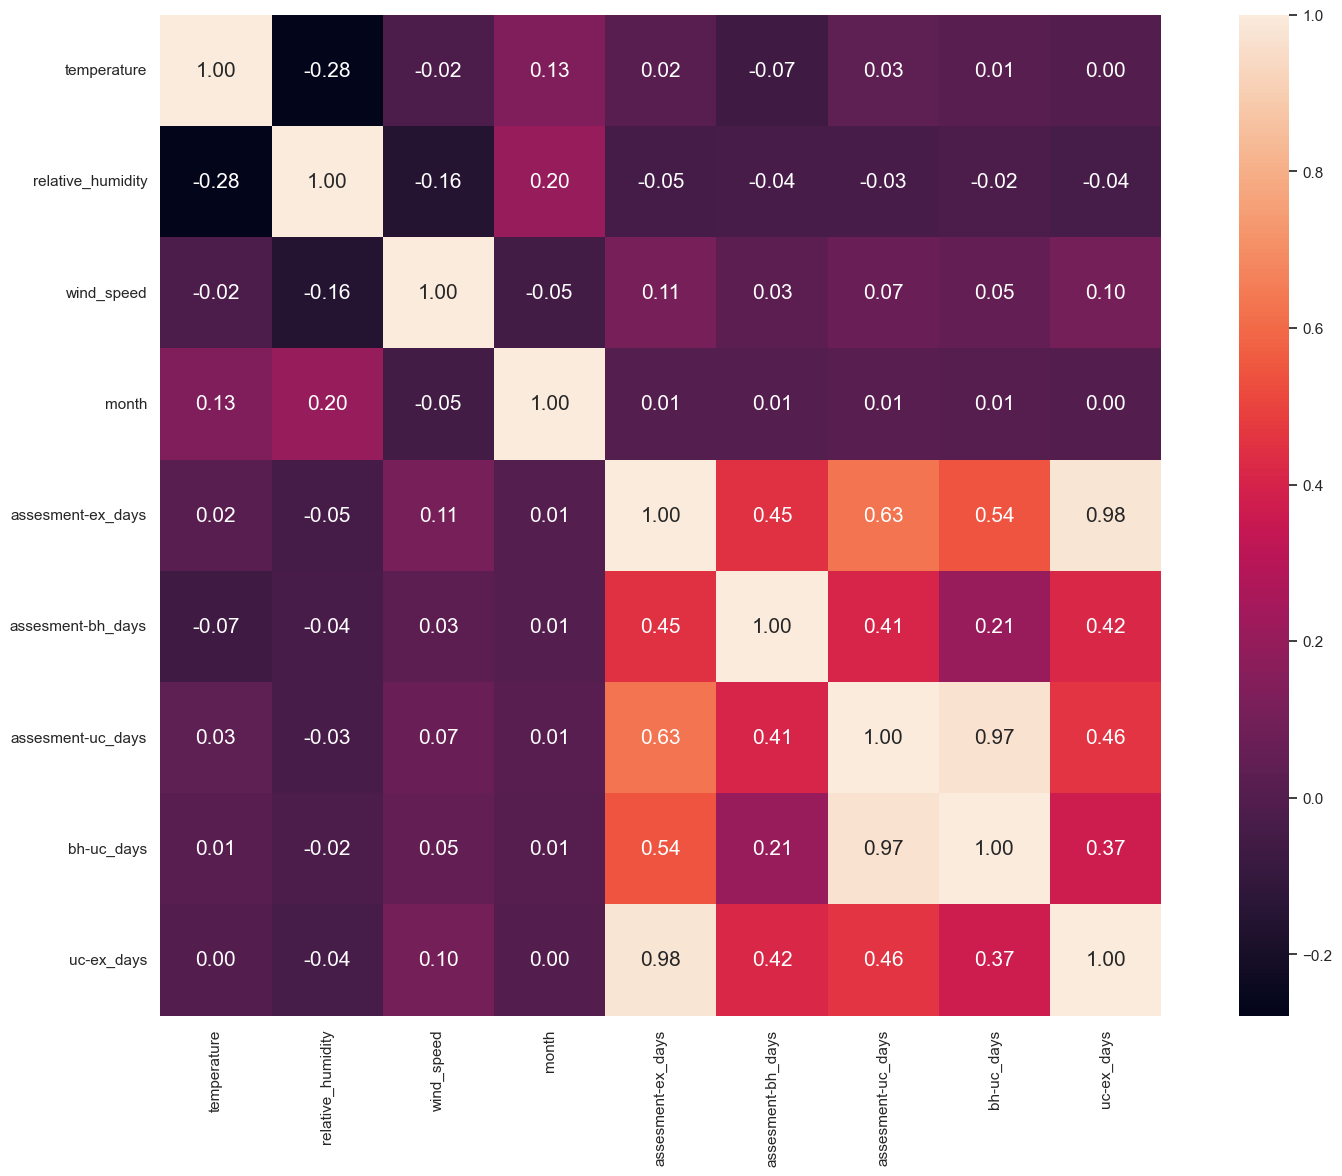

In [119]:
correlation(df_days_weather_corr[days_weather_corr_cols].fillna(df_days_weather_corr[days_weather_corr_cols].median()))

# Area

In [8]:
df_area[area_cols] = raw[area_cols]

### Days vs. Area

In [45]:
df_days_area_corr = pd.concat([df_area, df_time], axis=1)
days_area_corr_cols = ['assessment_hectares', 'bh_hectares', 'uc_hectares', 'ex_hectares', 'assesment-ex_days', 'assesment-bh_days', 'assesment-uc_days', 'bh-uc_days', 'uc-ex_days']

<module 'matplotlib.pyplot' from 'c:\\Users\\kater\\anaconda3\\envs\\work\\Lib\\site-packages\\matplotlib\\pyplot.py'>

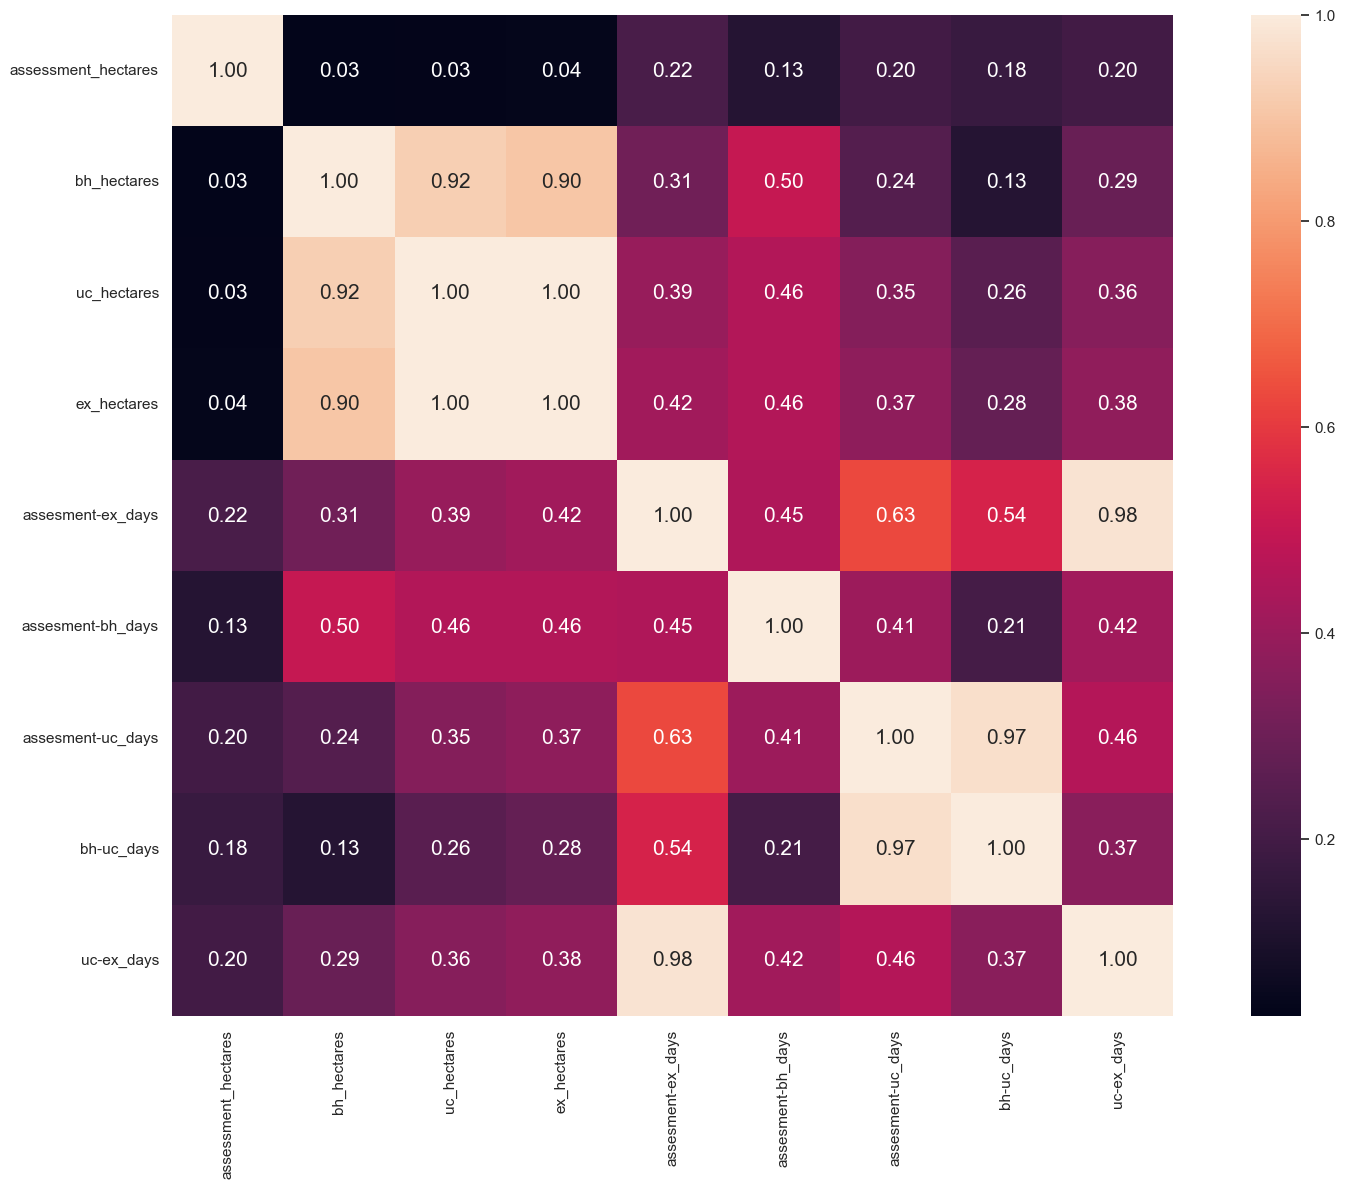

In [47]:
correlation(df_days_area_corr[days_area_corr_cols].fillna(df_days_area_corr[days_area_corr_cols].mean()))

### Weather vs. Area

In [9]:
df_weather_area_corr = pd.concat([df_weather, df_area], axis=1)
weather_area_corr_cols = ['assessment_hectares', 'bh_hectares', 'uc_hectares', 'ex_hectares', 'temperature', 'relative_humidity', 'wind_speed', 'month']

<module 'matplotlib.pyplot' from 'c:\\Users\\kater\\anaconda3\\envs\\work\\Lib\\site-packages\\matplotlib\\pyplot.py'>

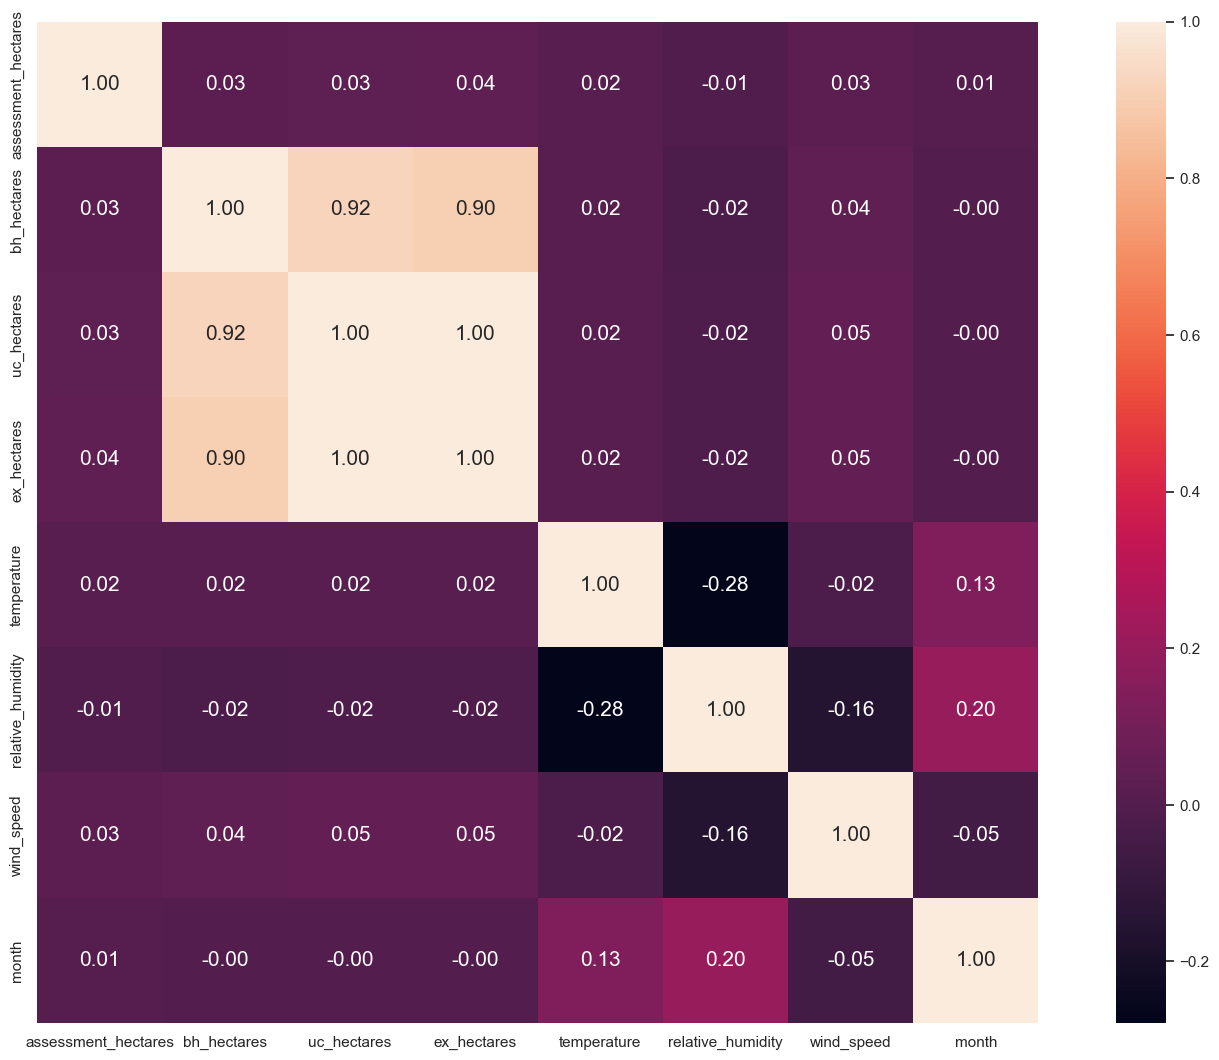

In [118]:
correlation(df_weather_area_corr[weather_area_corr_cols].fillna(df_weather_area_corr[weather_area_corr_cols].median()))

# Cause

In [10]:
df_cause = raw[['general_cause_desc']]
df_cause['general_cause_codes'] = pd.Categorical(df_cause['general_cause_desc']).codes

C:\Users\kater\AppData\Local\Temp\ipykernel_9200\2857757652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cause['general_cause_codes'] = pd.Categorical(df_cause['general_cause_desc']).codes


### Weather vs. Cause

In [83]:
df_weather_cause_corr = pd.concat([df_weather, df_cause], axis=1)
weather_cause_corr_cols = ['temperature', 'relative_humidity', 'wind_speed', 'month', 'general_cause_codes']

<module 'matplotlib.pyplot' from 'c:\\Users\\kater\\anaconda3\\envs\\work\\Lib\\site-packages\\matplotlib\\pyplot.py'>

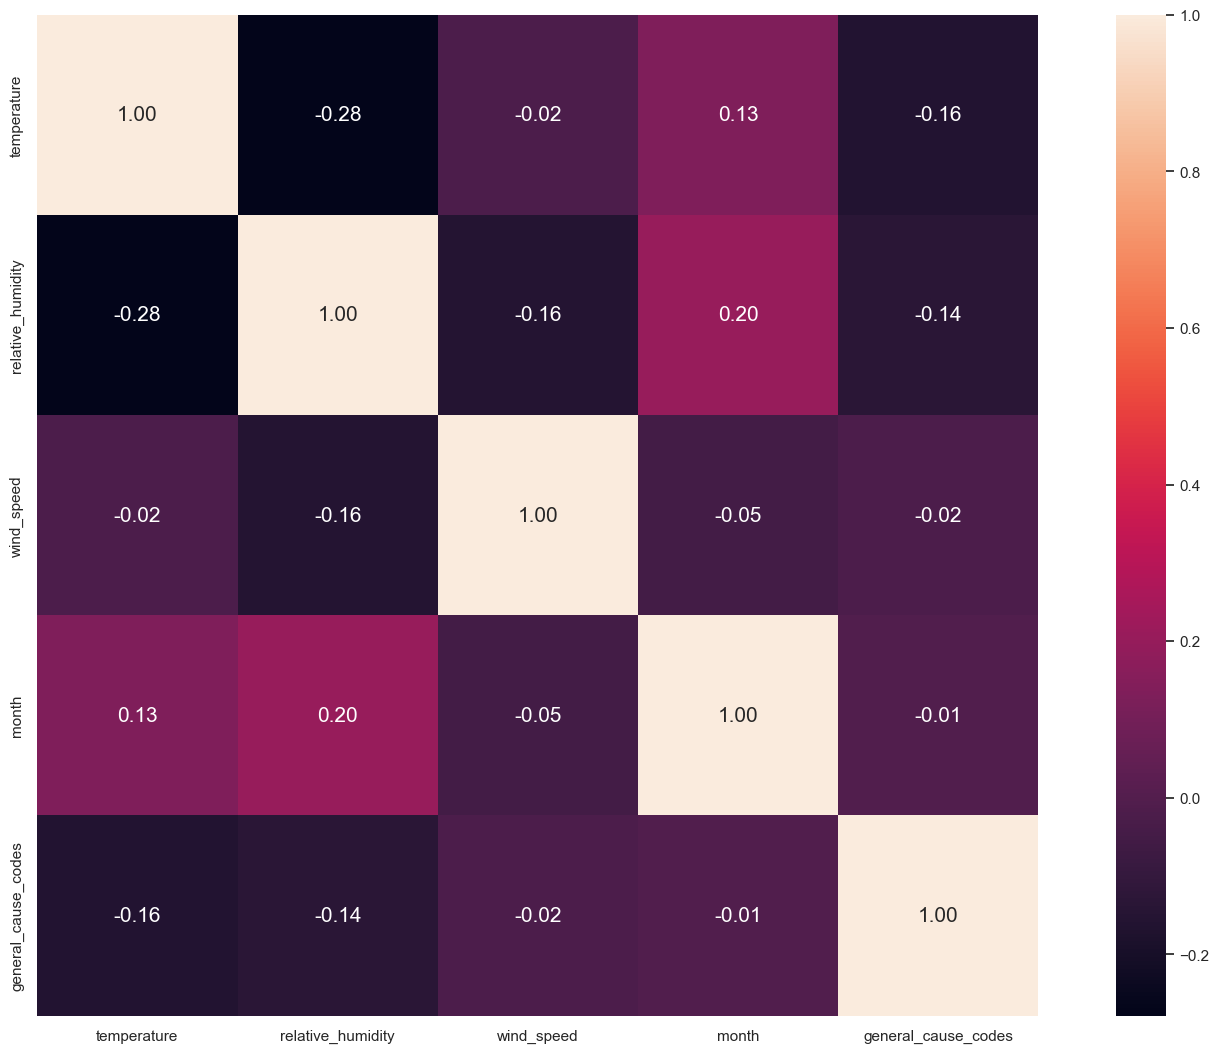

In [195]:
correlation(df_weather_cause_corr[weather_cause_corr_cols].fillna(df_weather_cause_corr[weather_cause_corr_cols].median()))

### Area vs. Cause

In [86]:
df_area_cause_corr = pd.concat([df_area, df_cause], axis=1)
area_cause_corr_cols = ['assessment_hectares', 'bh_hectares', 'uc_hectares', 'ex_hectares', 'general_cause_codes']

<module 'matplotlib.pyplot' from 'c:\\Users\\kater\\anaconda3\\envs\\work\\Lib\\site-packages\\matplotlib\\pyplot.py'>

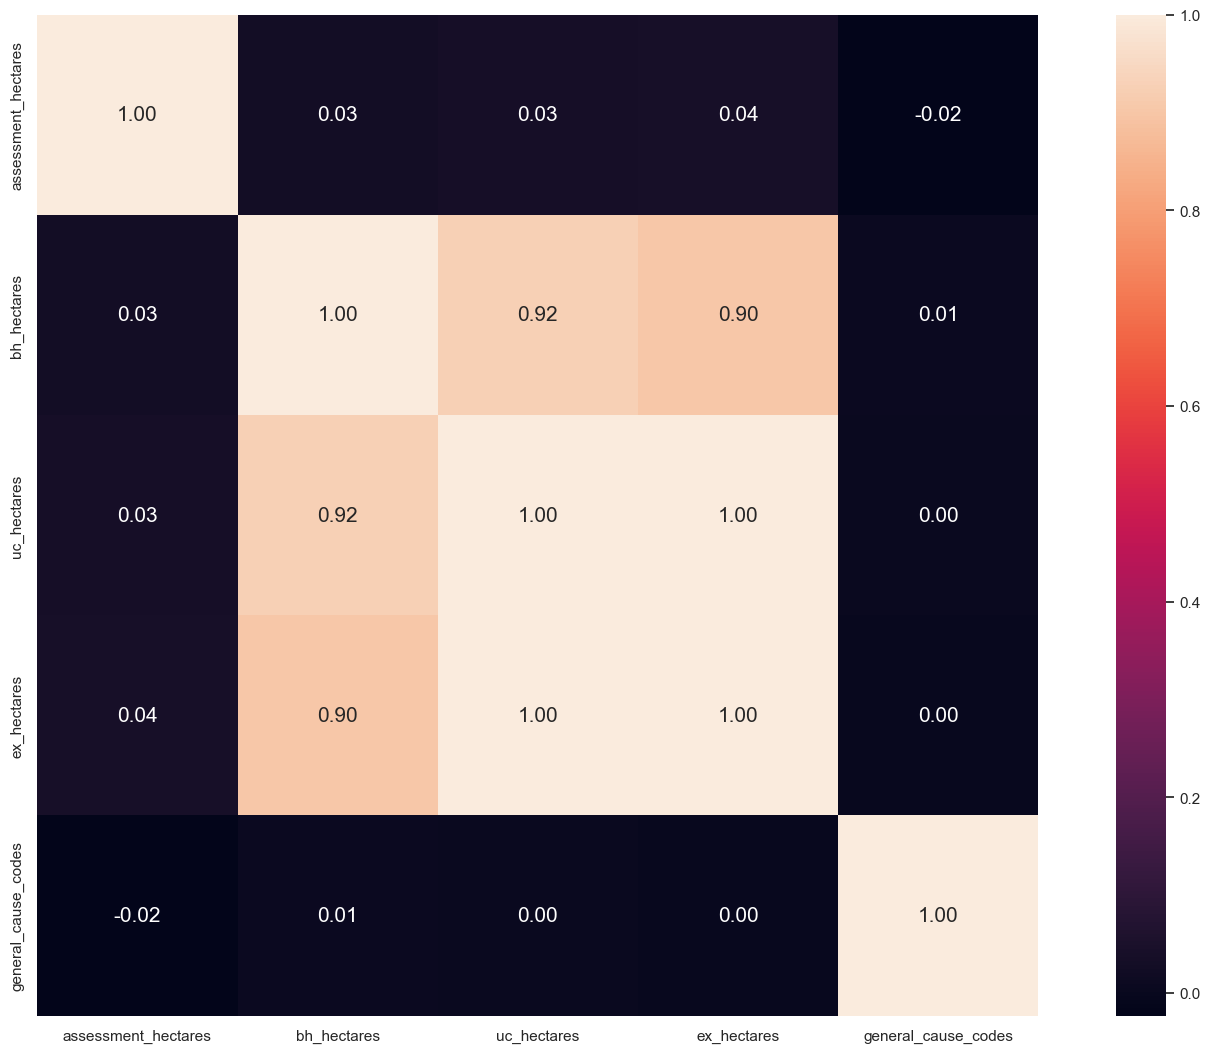

In [88]:
correlation(df_area_cause_corr[area_cause_corr_cols].dropna())

### Days Vs. Cause

In [90]:
df_time_cause_corr = pd.concat([df_time, df_cause], axis=1)
time_cause_corr_cols = ['assesment-ex_days', 'assesment-bh_days', 'assesment-uc_days', 'bh-uc_days', 'uc-ex_days', 'general_cause_codes']

<module 'matplotlib.pyplot' from 'c:\\Users\\kater\\anaconda3\\envs\\work\\Lib\\site-packages\\matplotlib\\pyplot.py'>

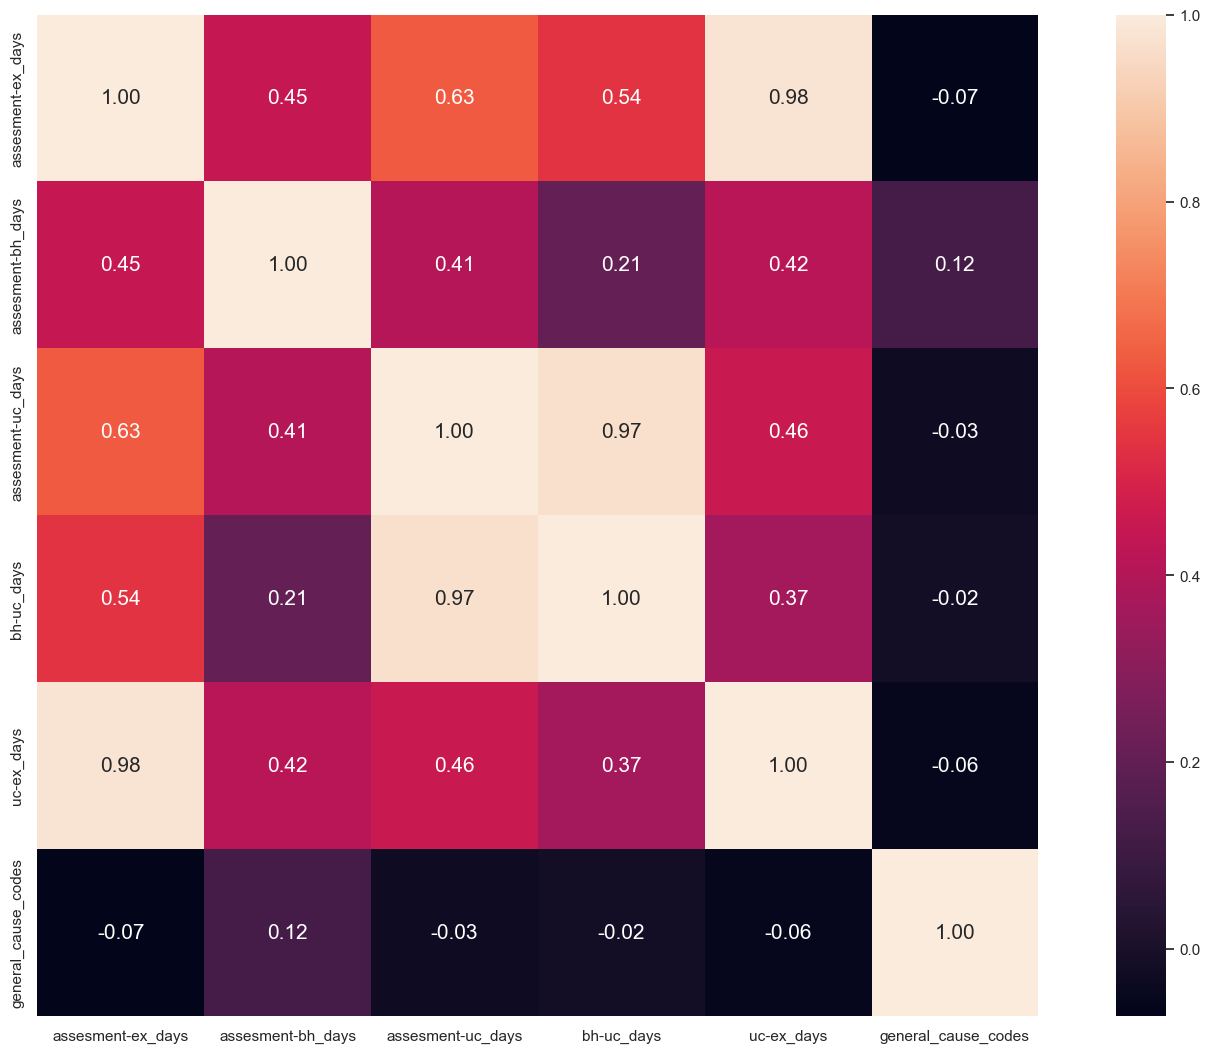

In [92]:
correlation(df_time_cause_corr[time_cause_corr_cols].dropna())

## Fire

In [ ]:
df_fire = raw[fire_cols]
df_fire['size_class_codes'] = pd.Categorical(df_fire['size_class']).codes
df_fire['fire_origin_codes'] = pd.Categorical(df_fire['fire_origin']).codes
df_fire['fire_type_codes'] = pd.Categorical(df_fire['fire_type']).codes
df_fire['fire_position_on_slope_codes'] = pd.Categorical(df_fire['fire_position_on_slope']).codes
df_fire['fuel_type_codes'] = pd.Categorical(df_fire['fuel_type']).codes

### Weather vs. Fire

In [204]:
df_weather_fire_corr = pd.concat([df_weather, df_fire], axis=1)
weather_fire_corr_cols = ['temperature', 'relative_humidity', 'wind_speed', 'month', 'size_class_codes', 'fire_spread_rate', 'fire_origin_codes', 'fire_type_codes', 'fire_position_on_slope_codes', 'fuel_type_codes']

<module 'matplotlib.pyplot' from 'c:\\Users\\kater\\anaconda3\\envs\\work\\Lib\\site-packages\\matplotlib\\pyplot.py'>

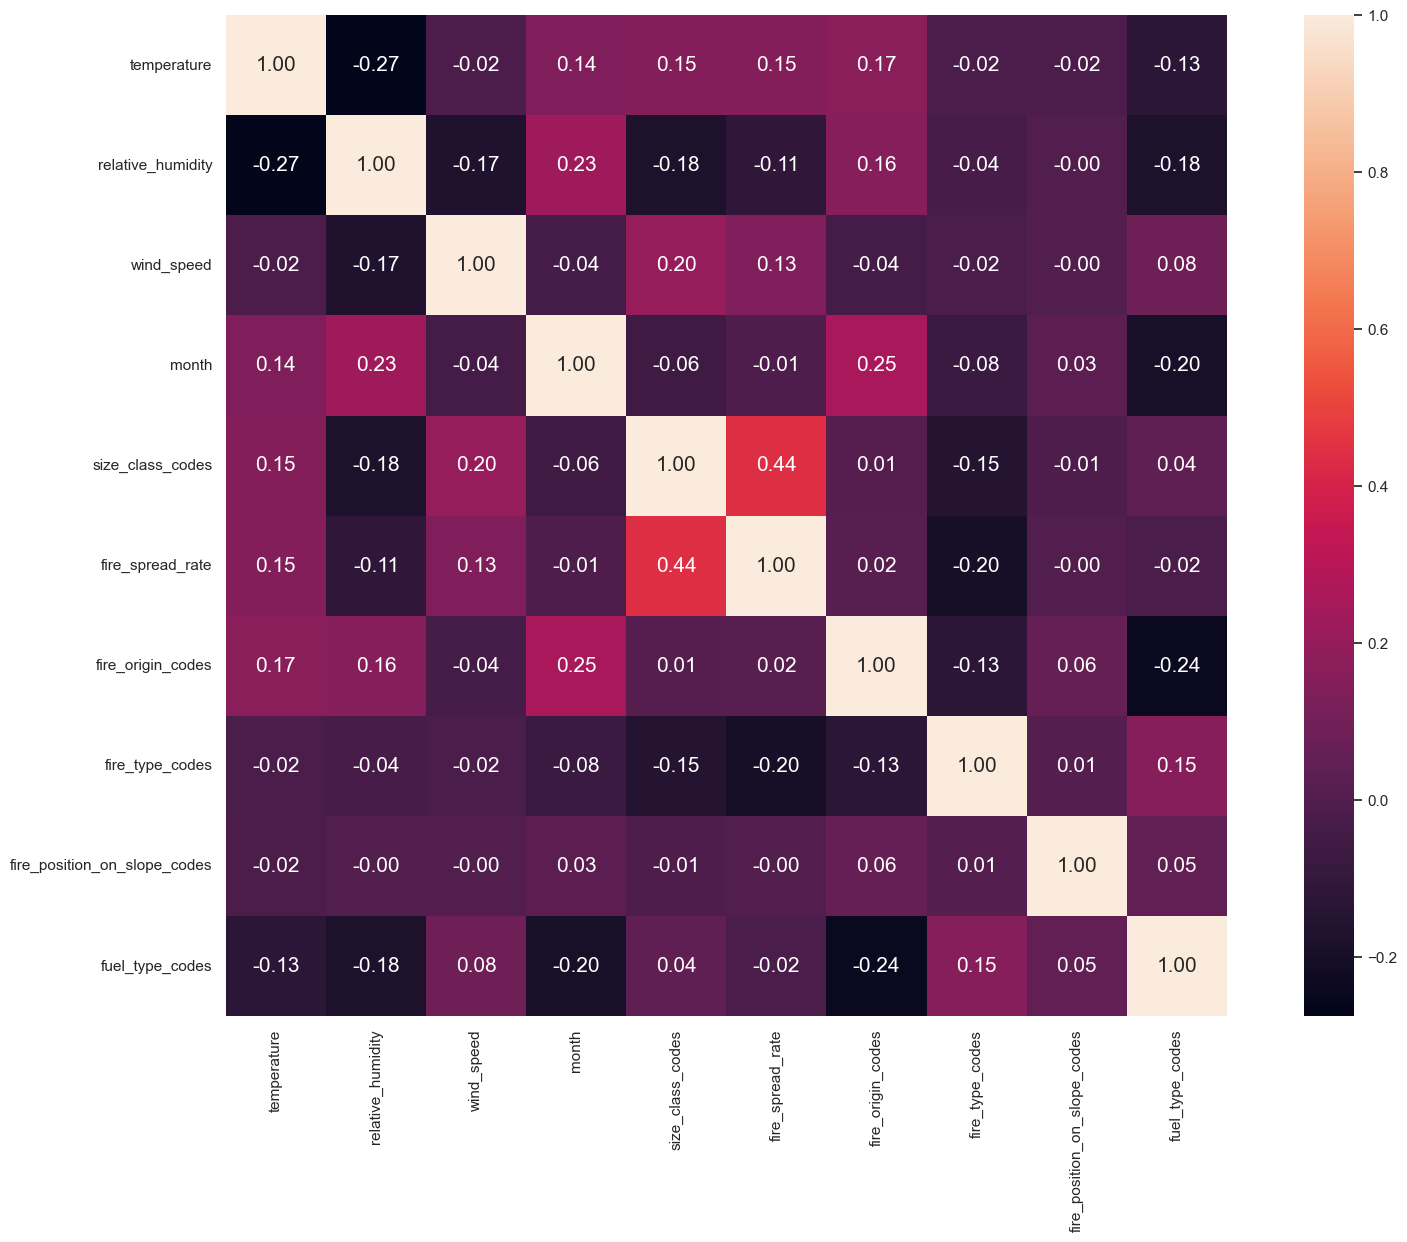

In [206]:
correlation(df_weather_fire_corr[weather_fire_corr_cols].dropna())

### Area vs. Fire

In [207]:
df_area_fire_corr = pd.concat([df_area, df_fire], axis=1)
area_fire_corr_cols = ['assessment_hectares', 'bh_hectares', 'uc_hectares', 'ex_hectares', 'size_class_codes', 'fire_spread_rate', 'fire_origin_codes', 'fire_type_codes', 'fire_position_on_slope_codes', 'fuel_type_codes']

<module 'matplotlib.pyplot' from 'c:\\Users\\kater\\anaconda3\\envs\\work\\Lib\\site-packages\\matplotlib\\pyplot.py'>

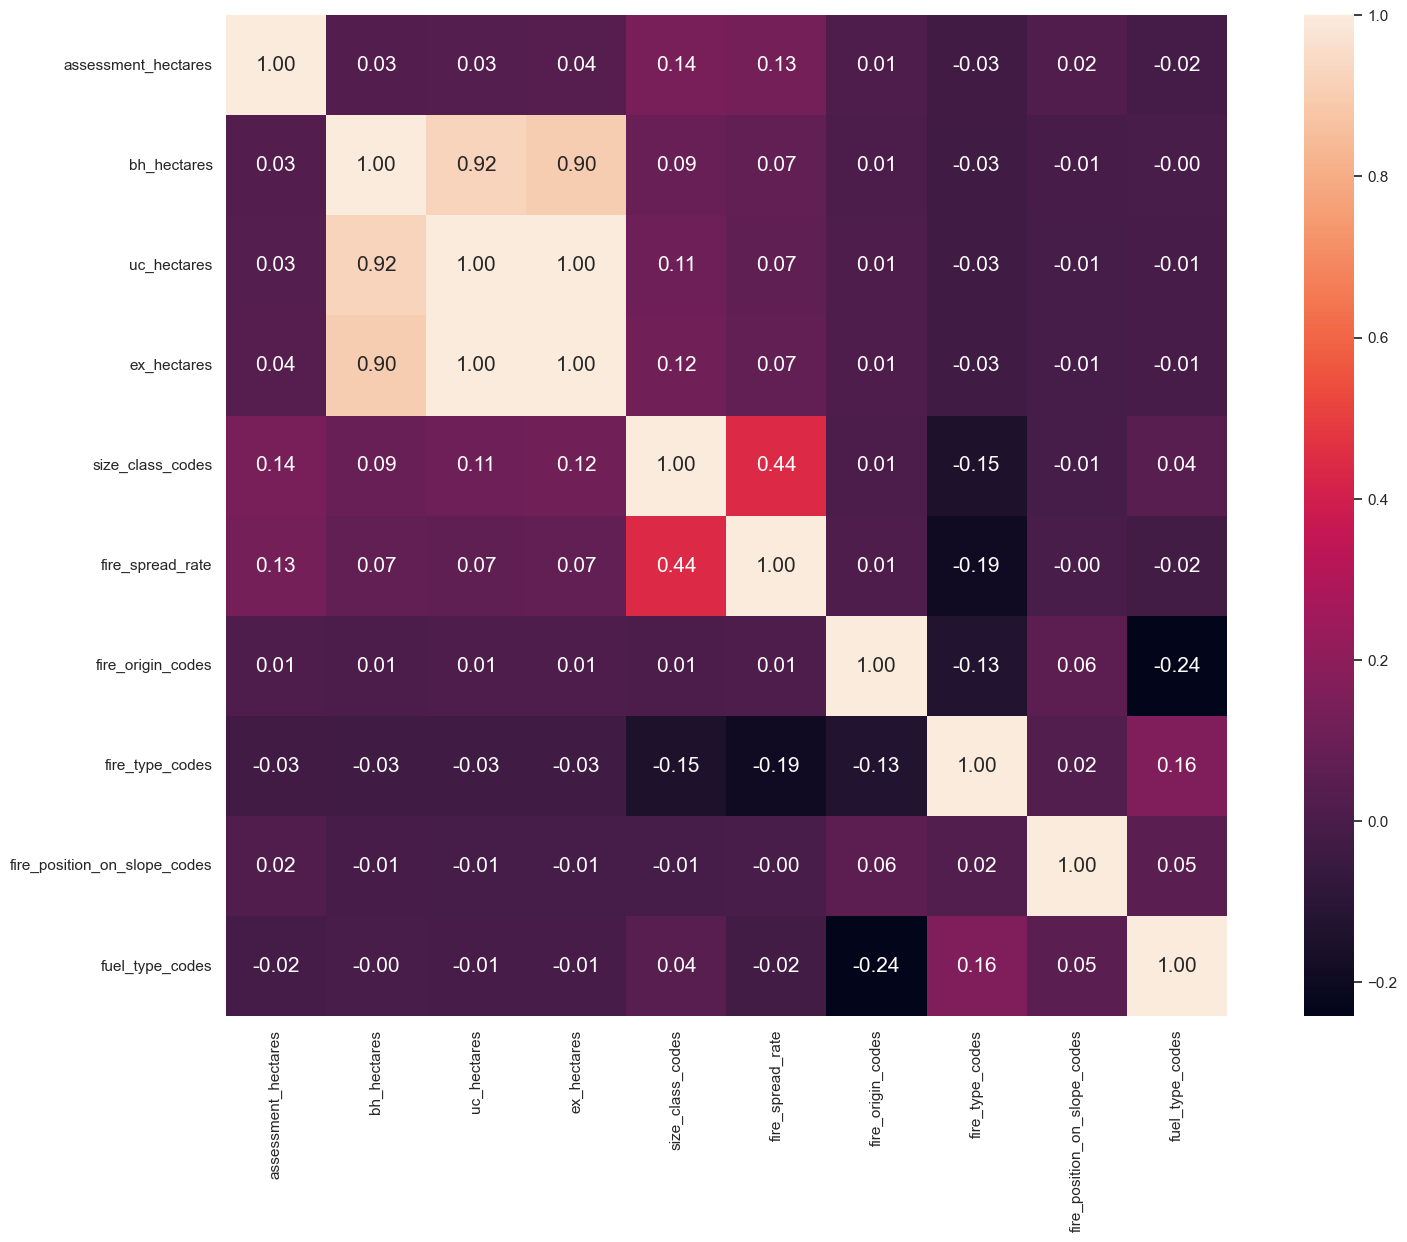

In [208]:
correlation(df_area_fire_corr[area_fire_corr_cols].dropna())

### Cause vs. Fire

In [212]:
df_cause_fire_corr = pd.concat([df_cause, df_fire], axis=1)
cause_fire_corr_cols = ['general_cause_codes', 'size_class_codes', 'fire_spread_rate', 'fire_origin_codes', 'fire_type_codes', 'fire_position_on_slope_codes', 'fuel_type_codes']

<module 'matplotlib.pyplot' from 'c:\\Users\\kater\\anaconda3\\envs\\work\\Lib\\site-packages\\matplotlib\\pyplot.py'>

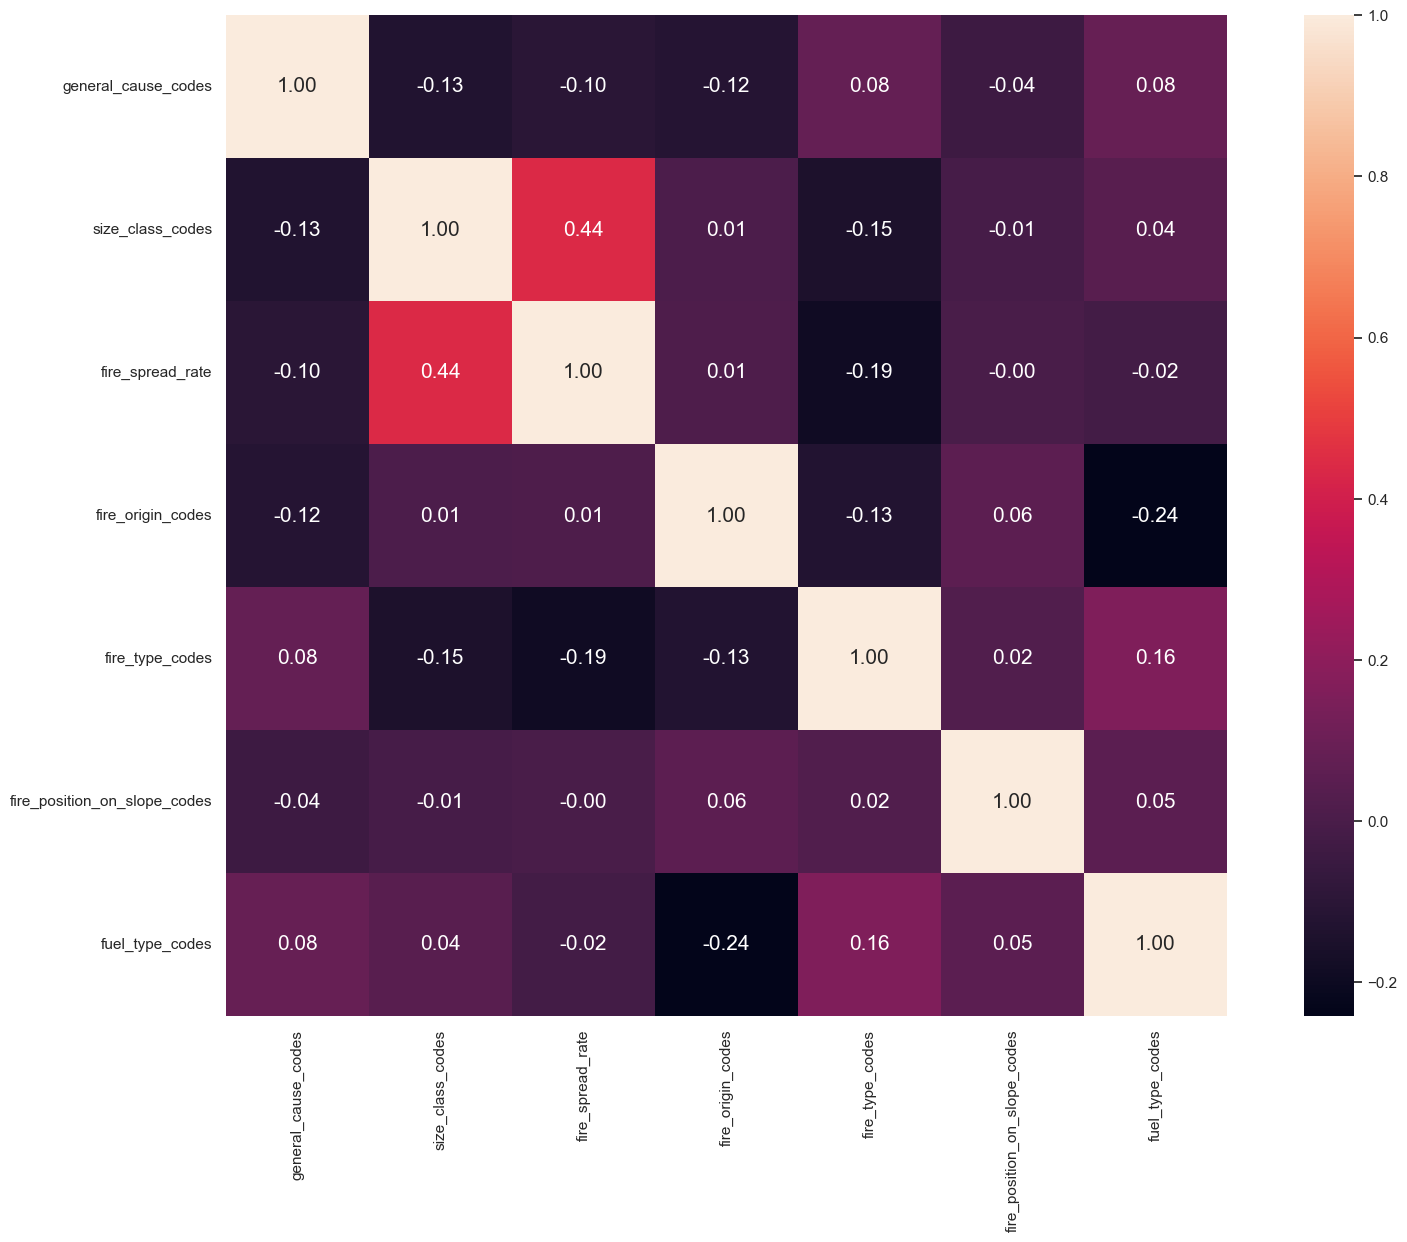

In [213]:
correlation(df_cause_fire_corr[cause_fire_corr_cols].dropna())

### Days vs. Fire

In [214]:
df_days_fire_corr = pd.concat([df_time, df_fire], axis=1)
days_fire_corr_cols = ['assesment-ex_days', 'assesment-bh_days', 'assesment-uc_days', 'bh-uc_days', 'uc-ex_days', 'size_class_codes', 'fire_spread_rate', 'fire_origin_codes', 'fire_type_codes', 'fire_position_on_slope_codes', 'fuel_type_codes']

<module 'matplotlib.pyplot' from 'c:\\Users\\kater\\anaconda3\\envs\\work\\Lib\\site-packages\\matplotlib\\pyplot.py'>

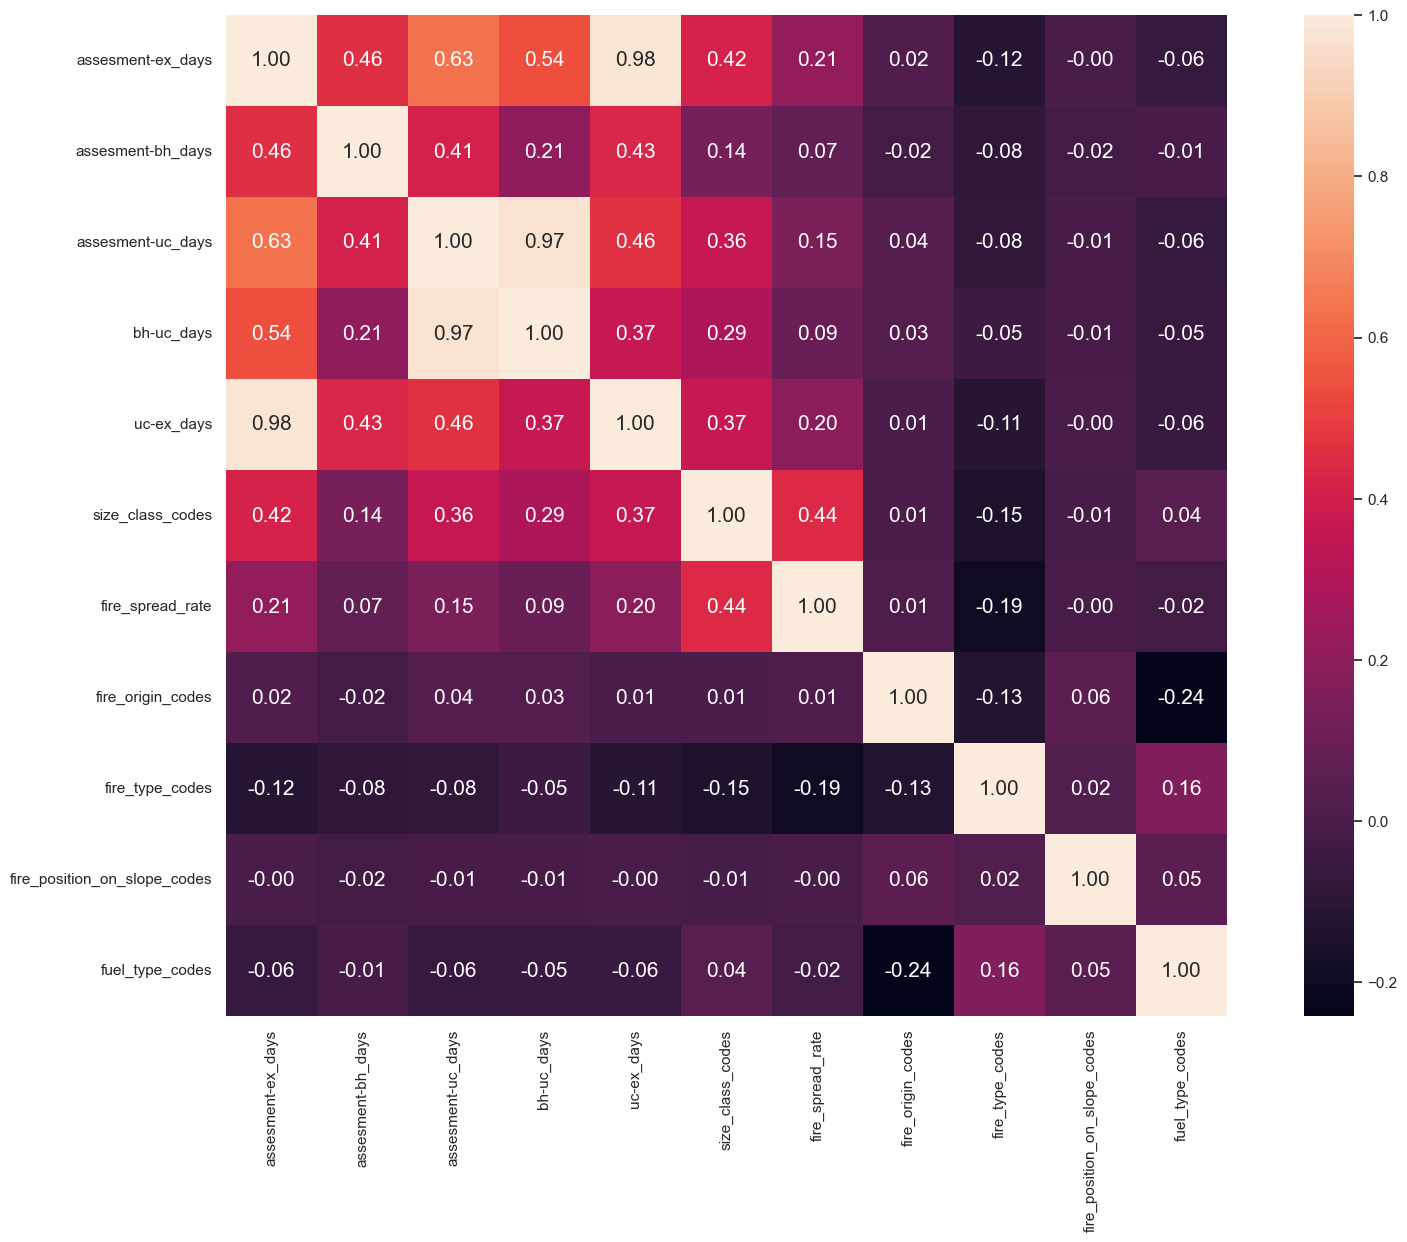

In [216]:
correlation(df_days_fire_corr[days_fire_corr_cols].dropna())

# Statistical Research

## Seasonality

### Area size by cause

In [13]:
# counts per cause per month
df_ha_per_cause_per_month_per_year = pd.concat([df_area, df_cause, df_time], axis=1)[['general_cause_desc', 'assessment_datetime', 'assessment_hectares']]#, 'assessment_doy', 'bh_hectares', 'uc_hectares', 'ex_hectares']]
df_ha_per_cause_per_month_per_year2 = df_ha_per_cause_per_month_per_year.copy()

df_ha_per_cause_per_month_per_year2['assessment_datetime'] = df_ha_per_cause_per_month_per_year2['assessment_datetime'].apply(lambda x: pd.to_datetime(f"{x.year}-{x.month}-01"))
# df_ha_per_cause_per_month_per_year['year'] = df_ha_per_cause_per_month_per_year['assessment_datetime'].dt.year
# df_ha_per_cause_per_month_per_year['month'] = df_ha_per_cause_per_month_per_year['assessment_datetime'].dt.month

df_ha_per_cause_per_month_per_year = df_ha_per_cause_per_month_per_year.drop(columns=['assessment_datetime'])
# df_ha_per_cause_per_month_per_year2 = df_ha_per_cause_per_month_per_year2.drop(columns=['assessment_doy'])
# df_ha_per_cause_per_month_per_year_grouped = df_ha_per_cause_per_month_per_year.groupby(['general_cause_desc', 'year', 'month', 'assessment_doy']).sum()
df_ha_per_cause_per_month_per_year_grouped2 = df_ha_per_cause_per_month_per_year2.groupby(['general_cause_desc', 'assessment_datetime']).sum()
df_ha_per_cause_per_month_per_year2 = df_ha_per_cause_per_month_per_year_grouped2.reset_index()
# df_ha_per_cause_per_month_per_year2 = df_ha_per_cause_per_month_per_year2.loc[df_ha_per_cause_per_month_per_year2['general_cause_desc'] != 'Undetermined']

In [19]:
f = px.bar(x=df_ha_per_cause_per_month_per_year2.assessment_datetime,
       y=df_ha_per_cause_per_month_per_year2['assessment_hectares'],
       color=df_ha_per_cause_per_month_per_year2['general_cause_desc'],
       title='HA per cause').update_layout(
       xaxis_title='date',
       yaxis_title='ha')
f.update_xaxes(
    dtick="M3",
    tickformat="%b\n%Y")

c:\Users\kater\anaconda3\envs\work\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [264]:
df_count_cause_per_month_per_year = pd.concat([df_area, df_cause, df_time], axis=1)[['general_cause_desc', 'assessment_datetime', 'assessment_hectares']]
df_count_cause_per_month_per_year['year'] = raw['fire_year']#df_count_cause_per_month_per_year['assessment_datetime'].dt.year
# df_count_cause_per_month_per_year['month'] = df_count_cause_per_month_per_year['assessment_datetime'].dt.month

df_count_cause_per_month_per_year = df_count_cause_per_month_per_year.drop(columns=['assessment_datetime'])
df_count_cause_per_month_per_year_plot = df_count_cause_per_month_per_year.groupby(['general_cause_desc', 'year']).count()
df_count_cause_per_month_per_year_plot = df_count_cause_per_month_per_year_plot.reset_index()

In [265]:
count_mean = df_count_cause_per_month_per_year_plot.loc[df_count_cause_per_month_per_year_plot['year'] >= 2017].groupby(['year']).sum().drop(columns=['general_cause_desc']).mean().values[0]

In [266]:
f2 = px.bar(x=df_count_cause_per_month_per_year_plot.year,
       y=df_count_cause_per_month_per_year_plot['assessment_hectares'],
       color=df_count_cause_per_month_per_year_plot['general_cause_desc'],)
f2.add_hline(y=count_mean, annotation_text='last 5 years average', annotation_position='top right')
f2.update_xaxes(dtick='Y')

### Cause per fire class

In [314]:
df_cause_class = pd.concat([df_area['current_size'], df_fire['size_class'], df_cause['general_cause_desc']], axis=1)
df_cause_class_sum = df_cause_class.groupby(['general_cause_desc', 'size_class']).sum()
df_cause_class_count = df_cause_class.groupby(['general_cause_desc', 'size_class']).count()
df_cause_class_sum = df_cause_class_sum.reset_index()
df_cause_class_count = df_cause_class_count.reset_index()

In [315]:
df_cause_class.groupby(['general_cause_desc', 'size_class']).sum()

current_size
general_cause_desc   size_class              
Agriculture Industry A                  11.05
                     B                 133.40
                     C                 549.71
                     D                 469.16
                     E                4890.84
...                                       ...
Undetermined         A                  15.48
                     B                 181.56
                     C                 607.13
                     D                 272.53
                     E              605999.20

[70 rows x 1 columns]

In [317]:
px.bar(x=df_cause_class_sum['size_class'],
       y=df_cause_class_sum['current_size'],
       color=df_cause_class_sum['general_cause_desc'],
       title='Cause per fire class (sum ha)').update_layout(
       xaxis_title='class',
       yaxis_title='ha',
       legend_title='Cause')

In [318]:
px.bar(x=df_cause_class_count['size_class'],
       y=df_cause_class_count['current_size'],
       color=df_cause_class_count['general_cause_desc'],
       title='Cause per fire class (count)').update_layout(
       xaxis_title='class',
       yaxis_title='#',
       legend_title='Cause')

In [386]:
raw[raw['general_cause_desc'].isin(['Recreation', 'Resident'])][['activity_class', 'true_cause', 'current_size']].groupby(['activity_class', 'true_cause']).sum().sort_values(by=['current_size']).to_csv('1.csv')

In [261]:
df_hum_light = pd.concat([df_fire['size_class'], df_cause['general_cause_desc'], df_area['current_size']], axis=1)
df_hum_light.loc[~df_hum_light['general_cause_desc'].isin(['Lightning', 'Under Investigation', 'Restart']), 'caused'] = 'Human'
df_hum_light.loc[df_hum_light['general_cause_desc'] == 'Under Investigation', 'caused'] = 'Under Investigation'
df_hum_light.loc[df_hum_light['general_cause_desc'] == 'Lightning', 'caused'] = 'Lightning'
df_hum_light['year'] = raw['fire_year']
df_hum_light = df_hum_light.drop(columns=['general_cause_desc', 'size_class'])

C:\Users\kater\AppData\Local\Temp\ipykernel_9200\3673169886.py:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Human' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [262]:
ha_sum = df_hum_light.groupby(['caused', 'year']).sum()
fires_num = df_hum_light.groupby(['caused', 'year']).count()

In [329]:
light_perc_per_year = 100 * df_hum_light.loc[df_hum_light['caused'] == 'Lightning'].groupby(['year']).count() / df_hum_light.groupby(['year']).count()
human_perc_per_year = 100 * df_hum_light.loc[df_hum_light['caused'] == 'Human'].groupby(['year']).count() / df_hum_light.groupby(['year']).count()
unk_perc_per_year = 100 * df_hum_light.loc[df_hum_light['caused'] == 'Under Investigation'].groupby(['year']).count() / df_hum_light.groupby(['year']).count()

In [338]:
light_perc_per_year_ha = 100 * df_hum_light.loc[df_hum_light['caused'] == 'Lightning'].groupby(['year']).sum()['current_size'] / df_hum_light.groupby(['year']).sum()['current_size']
human_perc_per_year_ha = 100 * df_hum_light.loc[df_hum_light['caused'] == 'Human'].groupby(['year']).sum()['current_size'] / df_hum_light.groupby(['year']).sum()['current_size']
unk_perc_per_year_ha = 100 * df_hum_light.loc[df_hum_light['caused'] == 'Under Investigation'].groupby(['year']).sum()['current_size'] / df_hum_light.groupby(['year']).sum()['current_size']

In [331]:
ttl = pd.concat([light_perc_per_year, human_perc_per_year, unk_perc_per_year])

In [352]:
ttl_ha = pd.concat([human_perc_per_year_ha, light_perc_per_year_ha, unk_perc_per_year_ha])

In [359]:
fig_pie = make_subplots(rows=1, cols=16, specs=[[{"type": "pie"}]*16])

i = 1
for y in ttl.index.unique():
        fig_pie.add_trace(go.Pie(
                values=ttl_ha.loc[y],
                labels=['Human', 'Lightning', 'Under Investigation'],
                title=y,
                name=y,
                textinfo='percent',
                textposition='inside',
                sort=False),
                row=1, col=i)
        i += 1
fig_pie.update_layout(title='% of total burned area per cause')

In [351]:
fig_pie = make_subplots(rows=1, cols=16, specs=[[{"type": "pie"}]*16])

i = 1
for y in ttl.index.unique():
        fig_pie.add_trace(go.Pie(
                values=ttl.loc[y, 'current_size'],
                labels=['Lightning', 'Human', 'Under Investigation'],
                title=y,
                name=y,
                textinfo='percent',
                textposition='inside'),
                row=1, col=i)
        i += 1
fig_pie.update_layout(title='% of fires per cause')

# Machine Learning

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
raw = pd.read_excel('fp-historical-wildfire-data-2006-2021.xlsx')

In [9]:
df = pd.DataFrame()
df_weather = pd.DataFrame()
df_area = pd.DataFrame()
df_fire = pd.DataFrame()

In [16]:
weather_cols = ['temperature', 'relative_humidity', 'wind_speed'] #'wind_direction'
area_cols = ['assessment_hectares', 'bh_hectares', 'uc_hectares', 'ex_hectares', 'current_size']
fire_cols = ['size_class', 'fire_origin', 'fire_spread_rate', 'fire_type', 'fire_position_on_slope', 'fuel_type']

In [17]:
df_area[area_cols] = raw[area_cols]

In [18]:
col = weather_cols

df[['year', 'month', 'day']] = raw['bh_fs_date'].apply(lambda x: x.timetuple()[:3]).tolist()
df[col] = raw[col]
df = df.drop(columns=['day', 'year'])
df_sum_ha_fire = df.groupby(by=['month']).mean()

for i in df_sum_ha_fire.index:
    df_weather = pd.concat([df_weather, pd.DataFrame([df_sum_ha_fire.loc[i].values], index=[i])])
df_weather = pd.DataFrame(columns=col)
df[['year', 'month', 'day']] = raw['bh_fs_date'].apply(lambda x: x.timetuple()[:3]).tolist()
df[col] = raw[col]
df = df.drop(columns=['day', 'year'])
df_weather['month'] = df.month
df_weather['temperature'] = df.temperature
df_weather['relative_humidity'] = df.relative_humidity
df_weather['wind_speed'] = df.wind_speed

In [19]:
df_cause = raw[['general_cause_desc']]
df_cause['general_cause_codes'] = pd.Categorical(df_cause['general_cause_desc']).codes



df_fire = raw[fire_cols]
df_fire['size_class_codes'] = pd.Categorical(df_fire['size_class']).codes
df_fire['fire_origin_codes'] = pd.Categorical(df_fire['fire_origin']).codes
df_fire['fire_type_codes'] = pd.Categorical(df_fire['fire_type']).codes
df_fire['fire_position_on_slope_codes'] = pd.Categorical(df_fire['fire_position_on_slope']).codes
df_fire['fuel_type_codes'] = pd.Categorical(df_fire['fuel_type']).codes

time_cols = ['assessment_datetime', 'bh_fs_date', 'uc_fs_date', 'ex_fs_date']
df_time = pd.DataFrame()
df_time[time_cols] = raw[time_cols]

# DOY
df_time['assessment_doy'] = df_time['assessment_datetime'].dt.dayofyear
df_time['bh_fs_doy'] = df_time['bh_fs_date'].dt.dayofyear
df_time['uc_fs_doy'] = df_time['uc_fs_date'].dt.dayofyear
df_time['ex_fs_doy'] = df_time['ex_fs_date'].dt.dayofyear

# Diff
df_time['assesment-ex_days'] = abs((df_time['assessment_datetime'] - df_time['ex_fs_date']).dt.days + 1)
df_time['assesment-bh_days'] = abs((df_time['assessment_datetime'] - df_time['bh_fs_date']).dt.days + 1)
df_time['assesment-uc_days'] = abs((df_time['assessment_datetime'] - df_time['uc_fs_date']).dt.days + 1)
df_time['bh-uc_days'] = abs((df_time['bh_fs_date'] - df_time['uc_fs_date']).dt.days + 1)
df_time['uc-ex_days'] = abs((df_time['uc_fs_date'] - df_time['ex_fs_date']).dt.days + 1)

C:\Users\maxim\AppData\Local\Temp\ipykernel_43756\3530320597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cause['general_cause_codes'] = pd.Categorical(df_cause['general_cause_desc']).codes
C:\Users\maxim\AppData\Local\Temp\ipykernel_43756\3530320597.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire['size_class_codes'] = pd.Categorical(df_fire['size_class']).codes
C:\Users\maxim\AppData\Local\Temp\ipykernel_43756\3530320597.py:8: SettingWithCopyWarning: 
A value is trying to be set on a 

In [20]:
df_weather_ml = df_weather.fillna(df_weather.median())
df_cause_ml = df_cause['general_cause_codes']
df_fire_ml = df_fire[['fire_spread_rate', 'fire_origin_codes', 'fire_type_codes', 'fire_position_on_slope_codes', 'fuel_type_codes']].replace(-1, np.nan).fillna(df_fire[['fire_spread_rate', 'fire_origin_codes', 'fire_type_codes', 'fire_position_on_slope_codes', 'fuel_type_codes']].median())
df_time_ml = df_time[['assessment_doy', 'bh_fs_doy', 'uc_fs_doy', 'ex_fs_doy', 'assesment-ex_days', 'assesment-bh_days', 'assesment-uc_days', 'bh-uc_days', 'uc-ex_days']]
df_location_ml = raw[['fire_location_latitude', 'fire_location_longitude']]

df_ml_X = pd.concat([df_weather_ml, df_cause_ml, df_fire_ml, df_time_ml, df_location_ml], axis=1)
df_area_ml_y = np.log10(df_area.loc[df_area['current_size'] >= 0.3, 'current_size'])

In [30]:
df_area_ml_y = df_fire['size_class_codes']

In [22]:
df_ml_X

temperature  relative_humidity  wind_speed  month  general_cause_codes  \
0             28.8               37.0        11.0      6                    4   
1              2.0               50.0        10.0      3                    1   
2             16.0               19.0        15.0      4                    3   
3              7.0               55.0        14.0      4                   11   
4             12.8               19.0        27.0      4                   11   
...            ...                ...         ...    ...                  ...   
22909          8.0               30.0        20.0      3                   11   
22910          1.0               65.0         0.0      3                   14   
22911         -1.0               35.0         5.0      3                   10   
22912          3.0               70.0         5.0      3                   11   
22913         19.0               40.0         6.0     12                   10   

       fire_spread_rate  fire_origin_codes  fire_type_codes  \
0                   3.0                5.0              4.0   
1                   0.0                5.0              3.0   
2                   0.5                1.0              4.0   
3                   0.0                1.0              4.0   
4                   5.0                4.0              4.0   
...                 ...                ...              ...   
22909               0.0                1.0              4.0   
22910               0.0                6.0              4.0   
22911               0.1                5.0              4.0   
22912               0.0                5.0              4.0   
22913               0.0                5.0              4.0   

       fire_position_on_slope_codes  fuel_type_codes  ...  bh_fs_doy  \
0                               1.0              1.0  ...        179   
1                               1.0              1.0  ...         89   
2                               1.0             10.0  ...        106   
3                               1.0             10.0  ...        107   
4                               1.0             10.0  ...         91   
...                             ...              ...  ...        ...   
22909                           0.0             10.0  ...         70   
22910                           3.0              1.0  ...         78   
22911                           3.0             11.0  ...         85   
22912                           1.0              1.0  ...         87   
22913                           1.0              1.0  ...        363   

       uc_fs_doy  ex_fs_doy  assesment-ex_days  assesment-bh_days  \
0            182        182                  2                  0   
1             89         99                  9                  1   
2            106        107                  0                  0   
3            107        107                  0                  1   
4             92        102                 10                  0   
...          ...        ...                ...                ...   
22909         70         70                  0                  0   
22910         78         78                  0                  1   
22911         85         85                  0                  0   
22912         87         87                  0                  1   
22913        363          8                 10                  0   

       assesment-uc_days  bh-uc_days  uc-ex_days  fire_location_latitude  \
0                      2           2           0               59.522139   
1                      1           1           9               52.692262   
2                      0           1           0               55.937050   
3                      1           1           0               56.425933   
4                      0           0          10               53.693450   
...                  ...         ...         ...                     ...   
22909                  0           0           0   

In [34]:
df_area_ml_y.unique()

array([2, 0, 1, 4, 3], dtype=int8)

In [169]:
df_ml_X = df_ml_X.loc[df_area['current_size'] >= 0.3]


In [32]:
for column in df_ml_X.columns: 
    df_ml_X[column] = (df_ml_X[column] - df_ml_X[column].mean()) / df_ml_X[column].std()

In [35]:
df_ml_X

temperature  relative_humidity  wind_speed     month  \
0         1.522775          -0.440328    0.319738 -0.167449   
1        -2.253016           0.294025    0.194728 -1.897353   
2        -0.280588          -1.457125    0.819778 -1.320718   
3        -1.548577           0.576469    0.694768 -1.320718   
4        -0.731429          -1.457125    2.319900 -1.320718   
...            ...                ...         ...       ...   
22909    -1.407690          -0.835749    1.444829 -1.897353   
22910    -2.393904           1.141356   -1.055374 -1.897353   
22911    -2.675679          -0.553306   -0.430323 -1.897353   
22912    -2.112128           1.423800   -0.430323 -1.897353   
22913     0.142075          -0.270862   -0.305313  3.292358   

       general_cause_codes  fire_spread_rate  fire_origin_codes  \
0                -0.811162          0.914118           0.490888   
1                -1.646681         -0.316151           0.490888   
2                -1.089668         -0.111106          -2.432051   
3                 1.138383         -0.316151          -2.432051   
4                 1.138383          1.734297          -0.239847   
...                    ...               ...                ...   
22909             1.138383         -0.316151          -2.432051   
22910             1.973902         -0.316151           1.221622   
22911             0.859877         -0.275142           0.490888   
22912             1.138383         -0.316151           0.490888   
22913             0.859877         -0.316151           0.490888   

       fire_type_codes  fire_position_on_slope_codes  fuel_type_codes  ...  \
0             0.524561                     -0.226501        -0.769501  ...   
1            -1.360896                     -0.226501        -0.769501  ...   
2             0.524561                     -0.226501         1.354707  ...   
3             0.524561                     -0.226501         1.354707  ...   
4             0.524561                     -0.226501         1.354707  ...   
...                ...                           ...              ...  ...   
22909         0.524561                     -1.545782         1.354707  ...   
22910         0.524561                      2.412061        -0.769501  ...   
22911         0.524561                      2.412061         1.590730  ...   
22912         0.524561                     -0.226501        -0.769501  ...   
22913         0.524561                     -0.226501        -0.769501  ...   

       bh_fs_doy  uc_fs_doy  ex_fs_doy  assesment-ex_days  assesment-bh_days  \
0       0.069916   0.117429   0.084619          -0.061659          -0.696123   
1      -1.659172  -1.662194  -1.482558           0.344252           0.316058   
2      -1.332566  -1.336887  -1.331505          -0.177634          -0.696123   
3      -1.313354  -1.317751  -1.331505          -0.177634           0.316058   
4      -1.620748  -1.604787  -1.425913           0.402239          -0.696123   
...          ...        ...        ...                ...                ...   
22909  -2.024202  -2.025773  -2.030126          -0.177634          -0.696123   
22910  -1.870505  -1.872688  -1.879073          -0.177634           0.316058   
22911  -1.736020  -1.738737  -1.746902          -0.177634          -0.696123   
22912  -1.697596  -1.700466  -1.709138          -0.177634           0.316058   
22913   3.604940   3.580998  -3.200789           0.402239          -0.696123   

       assesment-uc_days  bh-uc_days  uc-ex_days  fire_location_latitude  \
0               0.270528    0.303393   -0.166381                1.728532   
1               0.017192    0.025360    0.434099               -0.855691   
2              -0.236144    0.025360   -0.166381                0.372040   
3               0.017192    0.025360   -0.166381                0.557019   
4              -0.236144   -0.252674    0.500819               -0.476871   
...                  ...         ...         ...                     ...   
22909          

In [171]:
X_train, X_test, y_train, y_test = train_test_split(df_ml_X, df_area_ml_y, test_size=0.2, random_state=42)
model = LinearRegression()

In [172]:
model.fit(X_train, y_train)

c:\Users\kater\anaconda3\envs\work\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\kater\anaconda3\envs\work\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\kater\anaconda3\envs\work\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\kater\anaconda3\envs\work\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\kater\anaconda3\envs\work\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecate

LinearRegression()

In [173]:
y_pred = model.predict(X_test)

c:\Users\kater\anaconda3\envs\work\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\kater\anaconda3\envs\work\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\kater\anaconda3\envs\work\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



In [178]:
n = 798
10**y_test.values[n], 10**y_pred[n]

(16125.499999999987, 1588.0641322561157)

In [179]:
np.where(y_test.values > 4)

(array([ 35,  54, 141, 167, 199, 436, 469, 517, 535, 590, 737, 765, 798,
        842], dtype=int64),)

In [180]:
print(f'MAE: {mean_absolute_error(10**y_test, 10**y_pred)}\nMSE: {mean_squared_error(10**y_test, 10**y_pred)}\nR2: {r2_score(10**y_test, 10**y_pred)}')

MAE: 14956191.5590831
MSE: 2.640006094345422e+17
R2: -1275861910.1217194


c:\Users\kater\anaconda3\envs\work\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\kater\anaconda3\envs\work\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\kater\anaconda3\envs\work\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\kater\anaconda3\envs\work\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\kater\anaconda3\envs\work\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecate

In [39]:
raw.fire_number.str[0].unique()

array(['H', 'R', 'L', 'M', 'E', 'G', 'W', 'P', 'C', 'S'], dtype=object)

In [40]:
raw['new_fire_number'] = raw.fire_number.str[0]

In [41]:
raw[raw['new_fire_number'] == 'H']

fire_year fire_number fire_name  current_size size_class  \
0           2021      HWF053       NaN          5.50          C   
59          2021      HWF002       NaN          0.01          A   
60          2021      HWF001       NaN          0.01          A   
182         2021      HWF003       NaN          0.01          A   
196         2021      HWF004       NaN          0.07          A   
...          ...         ...       ...           ...        ...   
22880       2006      HWF164       NaN          0.01          A   
22882       2006      HWF166       NaN          0.50          B   
22886       2006      HWF165       NaN          0.01          A   
22899       2006      HWF167       NaN          0.05          A   
22902       2006      HWF168       NaN          0.28          B   

       fire_location_latitude  fire_location_longitude         fire_origin  \
0                   59.522139              -119.926971     Provincial Land   
59                  57.995423              -116.506437        Private Land   
60                  58.384750              -116.030517     Provincial Land   
182                 58.576485              -117.117482        Private Land   
196                 58.716067              -118.726633  Indian Reservation   
...                       ...                      ...                 ...   
22880               58.469917              -114.573300  Indian Reservation   
22882               58.503833              -115.171783  Indian Reservation   
22886               58.938133              -117.328167     Provincial Land   
22899               58.690383              -118.689250  Indian Reservation   
22902               58.228500              -114.325100     Provincial Land   

         general_cause_desc industry_identifier_desc  ...  \
0                 Lightning                      NaN  ...   
59     Agriculture Industry                      NaN  ...   
60               Government                Municipal  ...   
182                Resident                      NaN  ...   
196              Incendiary                      NaN  ...   
...                     ...                      ...  ...   
22880              Resident                      NaN  ...   
22882            Recreation                      NaN  ...   
22886       Forest Industry                      NaN  ...   
22899            Recreation                      NaN  ...   
22902            Recreation                      NaN  ...   

      first_bucket_drop_date          bh_fs_date bh_hectares  \
0                        NaT 2021-06-28 22:26:00        0.01   
59                       NaT 2021-04-15 15:00:00        0.01   
60                       NaT 2021-03-25 09:45:00        0.01   
182                      NaT 2021-04-28 11:55:00        0.01   
196                      NaT 2021-04-30 19:50:00        0.70   
...                      ...                 ...         ...   
22880                    NaT 2006-10-25 12:09:00        0.01   
22882                    NaT 2007-01-04 11:46:00        0.50   
22886                    NaT 2006-10-28 16:45:00        0.01   
22899                    NaT 2007-01-22 12:40:00        0.05   
22902                    NaT 2007-02-20 12:05:00        0.20   

               uc_fs_date uc_hectares          to_fs_date to_hectares  \
0     2021-07-01 13:26:00       10.00                 NaT         NaN   
59    2021-04-15 15:00:00        0.01 2021-04-16 12:22:00        0.01   
60    2021-03-25 09:46:00        0.01 2021-03-25 09:51:00        0.01   
182   2021-04-28 11:56:00        0.01                 NaT         NaN   
196   2021-04-30 19:50:00        0.70                 NaT         NaN   
...                   ...         ...                 ...         ...   
22880 2006-10-25 12:09:00        0.01 2006-10-25 13:45:00        0.01   
22882 2007-01-04 11:46:00        0.50                 NaT         NaN   
22886 2006-10-30 11:15:00        0.01                 NaT         NaN   
22899 2007-01-22 12:40:00        

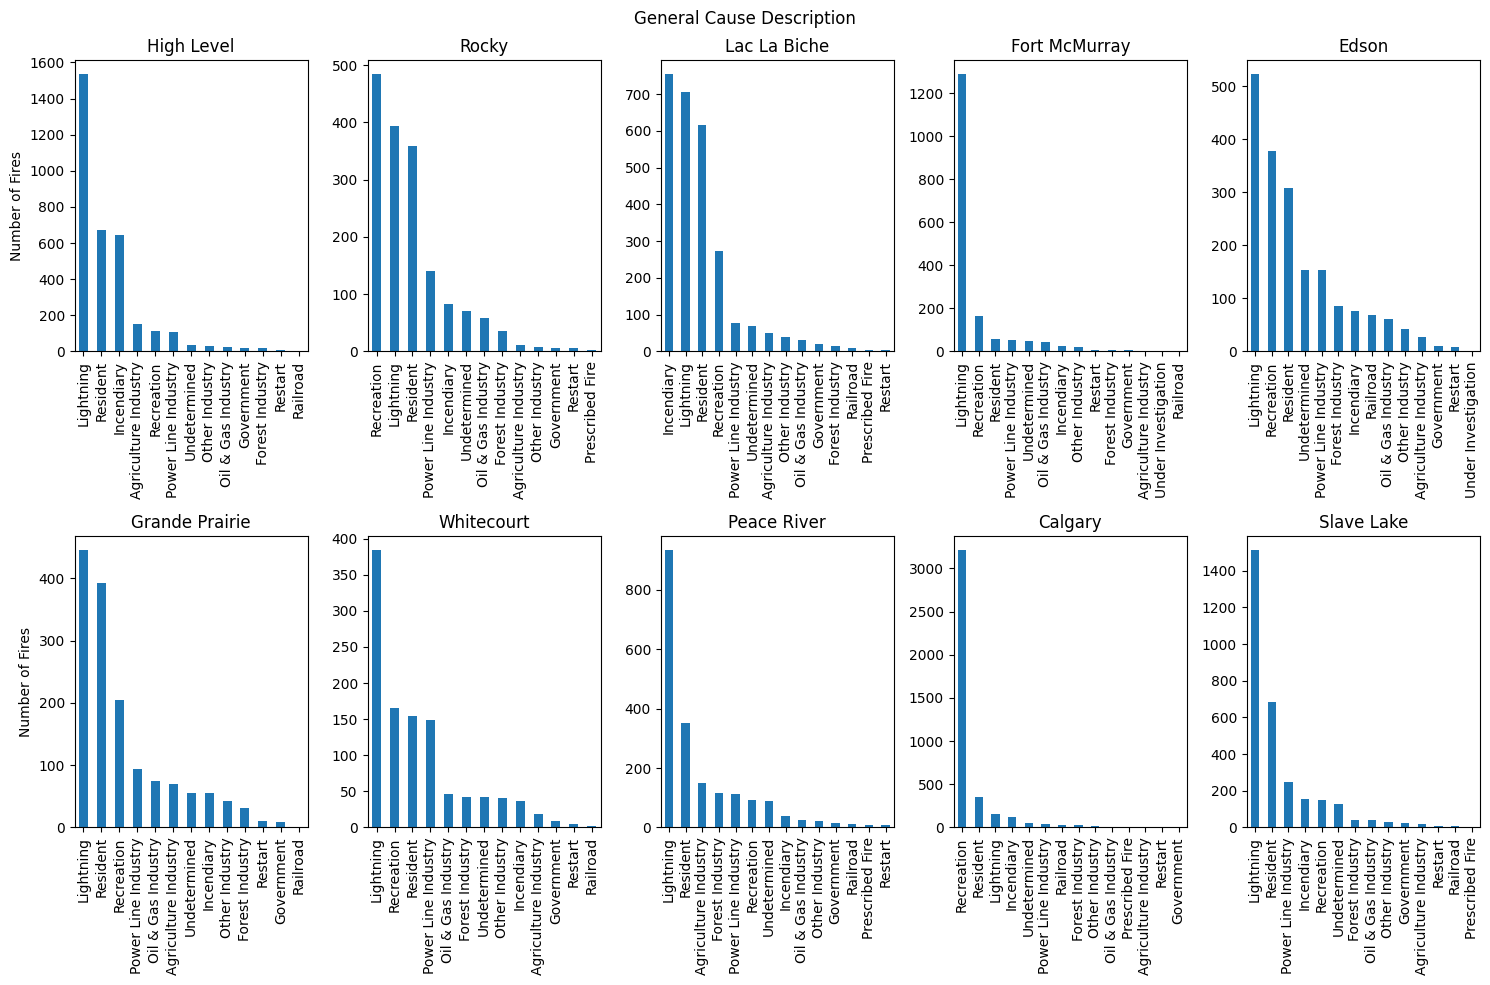

In [64]:
# year = 2010
fsa_dict={'C':'Calgary', 'E': 'Edson', 'H': 'High Level', 'G': 'Grande Prairie', 'L':'Lac La Biche',
          'M':'Fort McMurray', 'P':'Peace River', 'R':'Rocky', 'S':'Slave Lake', 'W':'Whitecourt'}
fig, ax = plt.subplots(2, 5, figsize=(15,10))
ax = ax.flatten()
for i, fsa in enumerate(raw.fire_number.str[0].unique()):
    year_data = raw[raw['new_fire_number'] == fsa]#[wf_df.current_size == 0.01]#[wf_df.fire_year == year]
    cause_counts = year_data['general_cause_desc'].value_counts()
    cause_counts.plot(kind='bar', ax=ax[i])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
    ax[i].set_xlabel('')
    # ax[i].set_ylabel('Number of Fires')
    ax[i].set_title(fsa_dict[fsa])
ax[0].set_ylabel('Number of Fires')
ax[5].set_ylabel('Number of Fires')
fig.suptitle('General Cause Description')
plt.tight_layout()
plt.show()


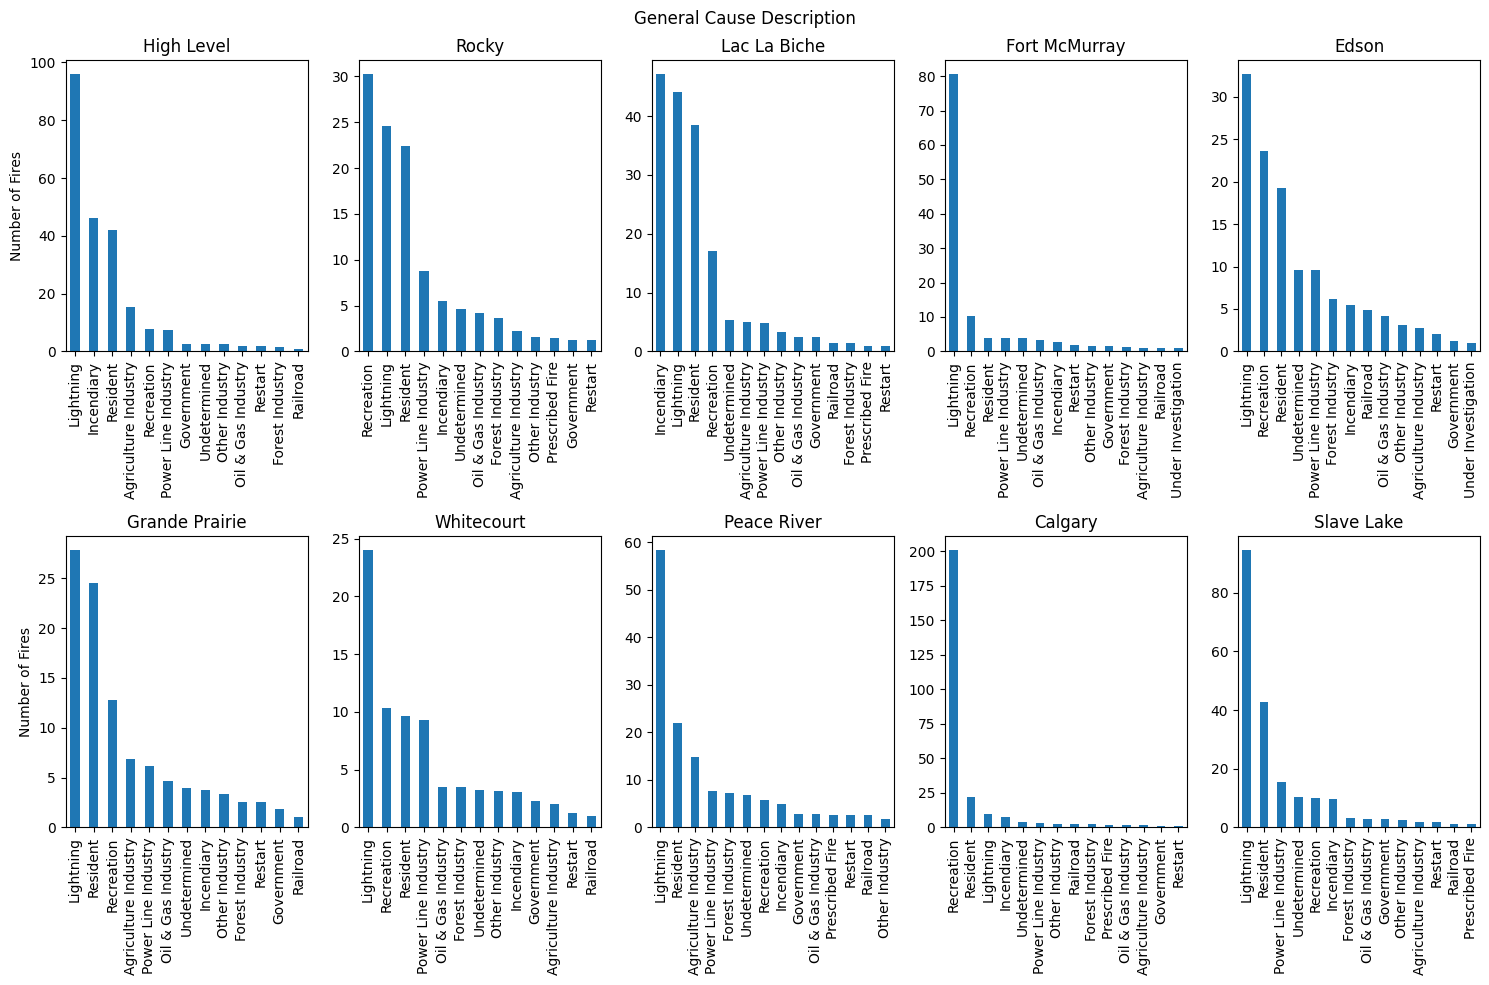

In [94]:
# year = 2010
fsa_dict={'C':'Calgary', 'E': 'Edson', 'H': 'High Level', 'G': 'Grande Prairie', 'L':'Lac La Biche',
          'M':'Fort McMurray', 'P':'Peace River', 'R':'Rocky', 'S':'Slave Lake', 'W':'Whitecourt'}
fig, ax = plt.subplots(2, 5, figsize=(15,10))
ax = ax.flatten()
for i, fsa in enumerate(raw.fire_number.str[0].unique()):
    year_data = raw[raw['new_fire_number'] == fsa]#[wf_df.current_size == 0.01]#[wf_df.fire_year == year]
    grouped = year_data[['fire_year', 'general_cause_desc']].groupby(['fire_year', 'general_cause_desc']).size().reset_index(name='counts')
    grouped = grouped.groupby('general_cause_desc')['counts'].mean().reset_index(name='average_count')
    grouped = grouped.set_index('general_cause_desc')
    grouped = grouped.sort_values('average_count',ascending=False)
    grouped.plot(kind='bar', ax=ax[i])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
    ax[i].set_xlabel('')
    # ax[i].set_ylabel('Number of Fires')
    ax[i].set_title(fsa_dict[fsa])
    ax[i].get_legend().remove()
ax[0].set_ylabel('Number of Fires')
ax[5].set_ylabel('Number of Fires')
fig.suptitle('General Cause Description')
plt.tight_layout()
plt.show()


In [79]:
grouped = year_data[['fire_year', 'general_cause_desc']].groupby(['fire_year', 'general_cause_desc']).size().reset_index(name='counts')
grouped.groupby('general_cause_desc')['counts'].mean().reset_index(name='average_count')


general_cause_desc  average_count
0   Agriculture Industry       2.000000
1        Forest Industry       3.076923
2             Government       2.750000
3             Incendiary       9.687500
4              Lightning      94.500000
5     Oil & Gas Industry       2.923077
6         Other Industry       2.384615
7    Power Line Industry      15.562500
8        Prescribed Fire       1.000000
9               Railroad       1.200000
10            Recreation      10.000000
11              Resident      42.875000
12               Restart       2.000000
13          Undetermined      10.416667

In [85]:
grouped.set_index('general_cause_desc')

average_count
general_cause_desc                 
Agriculture Industry       2.000000
Forest Industry            3.076923
Government                 2.750000
Incendiary                 9.687500
Lightning                 94.500000
Oil & Gas Industry         2.923077
Other Industry             2.384615
Power Line Industry       15.562500
Prescribed Fire            1.000000
Railroad                   1.200000
Recreation                10.000000
Resident                  42.875000
Restart                    2.000000
Undetermined              10.416667

In [92]:
grouped.sort_values('average_count',ascending=False)

average_count
general_cause_desc                 
Lightning                 94.500000
Resident                  42.875000
Power Line Industry       15.562500
Undetermined              10.416667
Recreation                10.000000
Incendiary                 9.687500
Forest Industry            3.076923
Oil & Gas Industry         2.923077
Government                 2.750000
Other Industry             2.384615
Agriculture Industry       2.000000
Restart                    2.000000
Railroad                   1.200000
Prescribed Fire            1.000000

In [91]:
?grouped.sort_values()

Object `grouped.sort_values()` not found.
